# Importing Neccessary Libraries

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE #maram

Using TensorFlow backend.


# Loading the Built-in Sklearn Breast Cancer Dataset

In [4]:
cancerData = datasets.load_breast_cancer()

In [5]:
X = pd.DataFrame(data = cancerData.data, columns=cancerData.feature_names )
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
y = cancerData.target

In [7]:
X.shape

(569, 30)

In [8]:
from sklearn import datasets

# Load the breast cancer dataset
cancer = datasets.load_breast_cancer()

# Display dataset information
print(f"Number of patients (samples): {cancer.data.shape[0]}")
print(f"Number of features: {cancer.data.shape[1]}")
print(f"Number of classes: {len(cancer.target_names)}")
print(f"Classes: {cancer.target_names}")

# Count the number of benign and malignant samples
benign_count = sum(cancer.target == 1)
malignant_count = sum(cancer.target == 0)
print(f"Number of benign samples: {benign_count}")
print(f"Number of malignant samples: {malignant_count}")

Number of patients (samples): 569
Number of features: 30
Number of classes: 2
Classes: ['malignant' 'benign']
Number of benign samples: 357
Number of malignant samples: 212


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

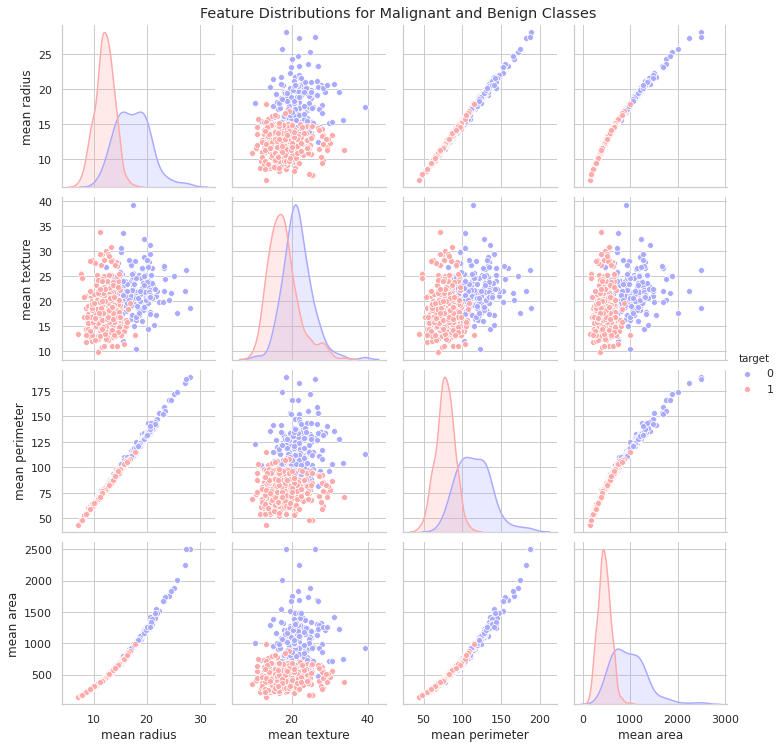

In [9]:
import pandas as pd
from sklearn import datasets

# Load the breast cancer dataset
cancerData = datasets.load_breast_cancer()

# Convert to a DataFrame
df = pd.DataFrame(data=cancerData.data, columns=cancerData.feature_names)
df['target'] = cancerData.target

# Display the first few rows
print(df.head())
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualizations
sns.set(style="whitegrid")

# Select a few features to plot
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']

# Create pair plots
sns.pairplot(df, vars=features, hue='target', palette='bwr')
plt.suptitle('Feature Distributions for Malignant and Benign Classes', y=1.02)
plt.show()

# Splitting into Train and Test datasets

In [10]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1,stratify=y,random_state=42)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)#maram

In [11]:
X_train.shape

(512, 30)

In [12]:
X_train_res.shape #maram

(642, 30)

In [13]:
X_train_res = np.array(X_train_res)
y_train_res = np.array(y_train_res)
def create_synthetic_data(X, y, n_samples):
    synthetic_X = []
    synthetic_y = []
    
    while len(synthetic_X) < n_samples:
        index = np.random.choice(range(len(X)))
        sample = X[index]
        label = y[index]
        # Add random noise to create a new synthetic sample
        noise = np.random.normal(0, 0.06, size=sample.shape)
        synthetic_sample = sample + noise
        
        synthetic_X.append(synthetic_sample)
        synthetic_y.append(label)
    
    return np.array(synthetic_X), np.array(synthetic_y)

# Number of synthetic samples to create
n_synthetic_samples = 3000 - len(X_train_res)

# Create synthetic samples
X_synthetic, y_synthetic = create_synthetic_data(X_train_res, y_train_res, n_synthetic_samples)


# Combine the original resampled data with synthetic data
X_train_final = np.vstack([X_train_res, X_synthetic])
y_train_final = np.hstack([y_train_res, y_synthetic])
X_train_final.shape
y_train_final.shape

(3000,)

In [14]:
y_test.shape

(57,)

# Applying StandardScaler()

In [15]:
scaler = StandardScaler()

In [16]:
X_train_final = scaler.fit_transform(X_train_final)
X_test = scaler.transform(X_test)

# Reshaping the dataset to 3-D to pass it through CNN

In [17]:
X_train_final = X_train_final.reshape(-1, 30, 1)
X_test = X_test.reshape(-1, 30, 1)

# Preparing the Model

In [18]:
model = Sequential()
model.add(Conv1D(filters=16,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Conv1D(32,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(32,activation='relu',kernel_regularizer=regularizers.l2(0.02)))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

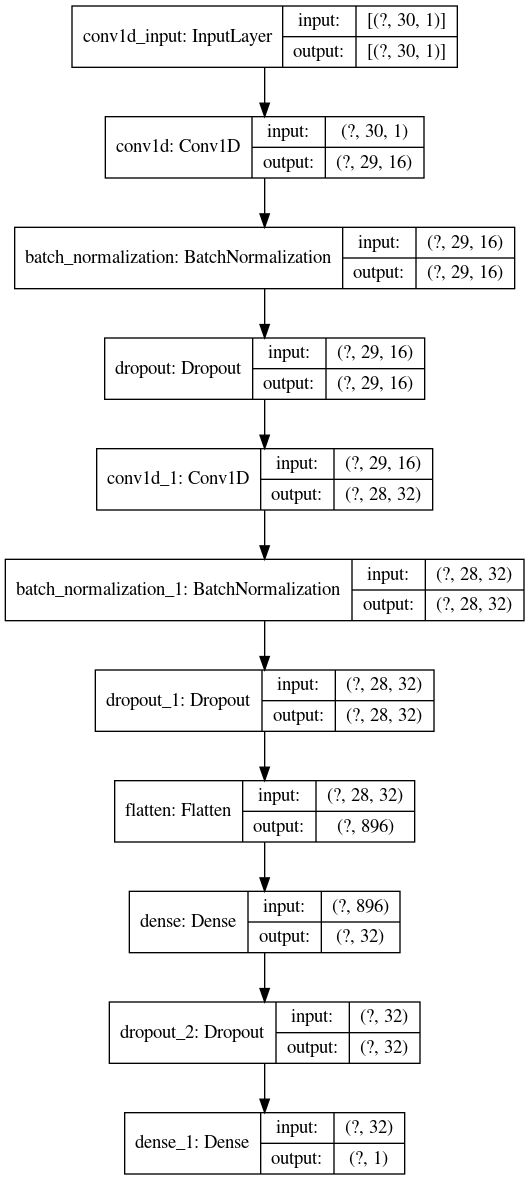

In [19]:
from tensorflow.keras.utils import plot_model
# Generate the plot
plot_model(model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# Display the plot in the notebook
from IPython.display import Image
Image(filename='cnn_model.png')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 16)            48        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 16)            64        
_________________________________________________________________
dropout (Dropout)            (None, 29, 16)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 32)            1056      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 32)            128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 896)               0

In [21]:
model.compile(optimizer=Adam(learning_rate=0.00005),loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
history = model.fit(X_train_final,y_train_final,epochs=35,verbose=1,validation_data=(X_test,y_test))

Train on 3000 samples, validate on 57 samples
Epoch 1/35
3000/3000 [==============================] - 2s 676us/sample - loss: 2.4012 - accuracy: 0.5240 - val_loss: 1.8581 - val_accuracy: 0.6491
Epoch 2/35
3000/3000 [==============================] - 0s 162us/sample - loss: 2.0931 - accuracy: 0.6127 - val_loss: 1.7388 - val_accuracy: 0.6842
Epoch 3/35
3000/3000 [==============================] - 0s 161us/sample - loss: 1.9037 - accuracy: 0.6833 - val_loss: 1.6149 - val_accuracy: 0.8070
Epoch 4/35
3000/3000 [==============================] - 0s 160us/sample - loss: 1.7543 - accuracy: 0.7433 - val_loss: 1.4986 - val_accuracy: 0.8947
Epoch 5/35
3000/3000 [==============================] - 0s 164us/sample - loss: 1.6219 - accuracy: 0.7857 - val_loss: 1.3985 - val_accuracy: 0.9649
Epoch 6/35
3000/3000 [==============================] - 0s 159us/sample - loss: 1.5642 - accuracy: 0.8023 - val_loss: 1.3197 - val_accuracy: 0.9825
Epoch 7/35
3000/3000 [==============================] - 1s 174us/s

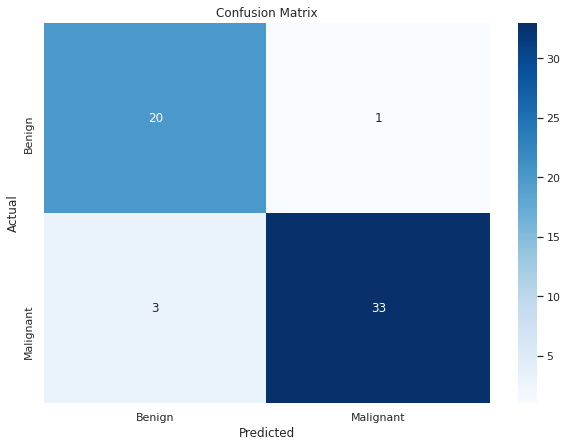


Accuracy: 0.9298245614035088
Precision: 0.9705882352941176
Recall (Sensitivity): 0.9166666666666666
F1-score: 0.9428571428571428


In [23]:
from sklearn import datasets, metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall (Sensitivity):", recall)
print("F1-score:", f1)

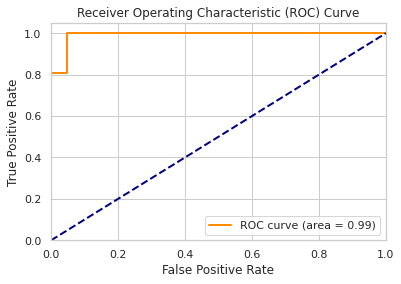

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Make predictions (probabilities) on the test set
y_pred_prob = model.predict(X_test).flatten()

# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plots of Accuracy and Loss

In [25]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

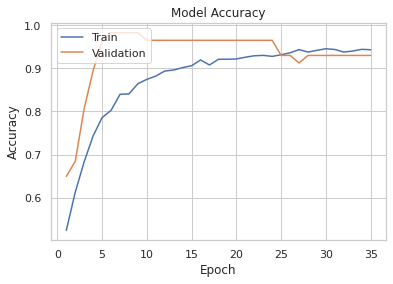

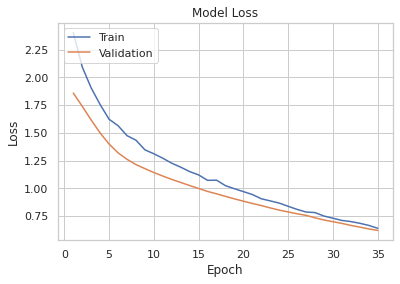

In [26]:
plotLearningCurve(history,35)

In [27]:
from tensorflow.keras.applications import VGG16
local_weights_file='/kaggle/input/vgg16-weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
model = VGG16(weights=local_weights_file, include_top=False, input_shape=(224, 224, 3))

In [28]:
import cv2
import matplotlib.pyplot as plt

# Specify the path to the image file
image_path = "/kaggle/input/test-pics/IMG-0028-00001.jpg"

# Read the image using OpenCV
orig = cv2.imread(image_path)

# Check if the image was loaded correctly
if orig is None:
    print("Error: Image not found or unable to load.")
else:
    # Convert BGR to RGB format for matplotlib
    img_rgb = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

In [29]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications import imagenet_utils
import numpy as np

# Load the image with the correct target_size argument
image = load_img("/kaggle/input/test-pics/IMG-0028-00001.jpg", target_size=(224, 224))

# Convert the image to a NumPy array
image = img_to_array(image)

# Expand the dimensions to create a batch size of 1
image = np.expand_dims(image, axis=0)

# Preprocess the image for the VGG16 model
image = imagenet_utils.preprocess_input(image)

In [30]:
preds=model.predict(image)
i=np.argmax(preds[0])

In [31]:
from keras.applications import VGG16
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
from keras.layers import Flatten, Dense
from keras.models import Model

# Load the VGG16 model with pre-trained ImageNet weights and excluding top layers
base_model = VGG16(weights=None, include_top=False, input_shape=(224, 224, 3))

# Add custom classifier layers on top of VGG16 base
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model (add loss function, optimizer, etc.)
# model.compile(...)

# Load and preprocess the input image
image_path = "/kaggle/input/test-pics/IMG-0028-00001.jpg"
image = load_img(image_path, target_size=(224, 224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

# Perform prediction
prediction = model.predict(image)

# Get the scalar prediction value
prediction_value = prediction[0][0]

# You can define your own decoding mechanism based on your custom classifier output
# For example, if you're doing binary classification, you can use a threshold to determine the class
threshold = 0.5
label = "Positive" if prediction_value > threshold else "Negative"
probability = prediction_value if label == "Positive" else 1 - prediction_value

print("[INFO] Prediction: {} (Probability: {:.2f}%)".format(label, probability * 100))


[INFO] Prediction: Negative (Probability: 64.66%)


In [32]:
import tensorflow as tf
from keras.models import Model

class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        for layer in reversed(self.model.layers):
            if len(layer.output.shape) == 4:
                return layer.name
        raise ValueError("Could not find a 4D layer. Cannot apply GradCAM.")

    def compute_heatmap(self, image, eps=1e-8):
        gradModel = Model(inputs=self.model.inputs, outputs=[self.model.get_layer(self.layerName).output, self.model.output])

        with tf.GradientTape() as tape:
            inputs = tf.cast(image, tf.float32)
            convOutputs, predictions = gradModel(inputs)
            if predictions.shape.ndims == 2:
                num_classes = predictions.shape[1]
                if self.classIdx >= num_classes:
                    print("Warning: Invalid class index for multi-class prediction. Adjusting class index to the last class.")
                    self.classIdx = num_classes - 1
                predictions = predictions[:, self.classIdx]
            elif predictions.shape.ndims == 1:
                if self.classIdx != 0:
                    raise ValueError("Invalid class index for scalar prediction.")
                predictions = tf.expand_dims(predictions, axis=0)
            else:
                raise ValueError("Invalid shape for predictions tensor.")
                
        grads = tape.gradient(predictions, convOutputs)

        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads

        ConvOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, ConvOutputs), axis=-1)

        # Resize heatmap to match image dimensions
        heatmap = tf.expand_dims(cam, axis=0)  # Add batch dimension
        heatmap = tf.expand_dims(heatmap, axis=-1)  # Add channel dimension
        heatmap = tf.image.resize(heatmap, (image.shape[1], image.shape[2]))

        numer = heatmap - tf.reduce_min(heatmap)
        denom = (tf.reduce_max(heatmap) - tf.reduce_min(heatmap)) + eps
        heatmap = numer / denom
        heatmap = tf.cast(heatmap * 255, tf.uint8)
        return heatmap
    def overlay_heatmap(self, heatmap, image, alpha=0.5, colormap=cv2.COLORMAP_JET):
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        return (heatmap, output)

cam = GradCAM(model, i)
heatmap = cam.compute_heatmap(image) # Assuming `image` is a tensor representing the input image


TensorFlow Version: 2.1.0


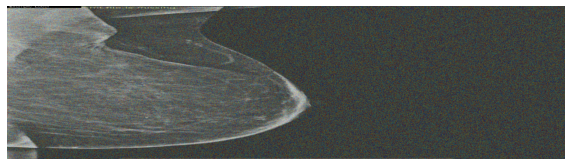

Final heatmap shape: (3328, 2560, 3)


In [33]:
import numpy as np
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt

# Check TensorFlow version
print("TensorFlow Version:", tf.__version__)

# Load the input image
image_path = '/kaggle/input/test-pics/IMG-0030-00001.jpg'
orig = cv2.imread(image_path)

# Check if the image is loaded successfully
if orig is None:
    print("Error: Unable to load image. Please check the image path:", image_path)
    exit()

# Placeholder for heatmap generation
# Assuming the heatmap is generated by some model or method
# For demonstration, we create a random heatmap of the same size as the input image
heatmap = np.random.rand(orig.shape[0], orig.shape[1]).astype(np.float32)

# Overlay the heatmap on the original image
def overlay_heatmap(heatmap, image, alpha=0.5):
    # Normalize heatmap values to range [0, 255]
    heatmap_normalized = cv2.normalize(heatmap, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    # Apply colormap to heatmap
    heatmap_colored = cv2.applyColorMap(heatmap_normalized, cv2.COLORMAP_JET)
    # Resize the heatmap to match the size of the original image
    heatmap_resized = cv2.resize(heatmap_colored, (image.shape[1], image.shape[0]))
    # Overlay the heatmap on the original image
    overlay = cv2.addWeighted(heatmap_resized, alpha, image, 1 - alpha, 0)
    return heatmap_resized, overlay

# Generate or obtain the resized heatmap array
resized_heatmap_array = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))

# Overlay the heatmap on the original image
(heatmap, output) = overlay_heatmap(resized_heatmap_array, orig, alpha=0.5)

# Draw a filled rectangle at the top of the output image
cv2.rectangle(output, (0, 0), (340, 40), (0, 0, 0), -1)

# Put the label text on the output image
label = "Example Label"  # Define your label text
cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

# Resize the output image
output = cv2.resize(output, (output.shape[1], 700))

# Apply threshold to heatmap
threshold_value = 100  # Define your threshold value
thresholded_heatmap = cv2.threshold(heatmap, threshold_value, 255, cv2.THRESH_BINARY)[1]

# Convert thresholded heatmap to single-channel image (grayscale)
thresholded_heatmap_gray = cv2.cvtColor(thresholded_heatmap, cv2.COLOR_BGR2GRAY)

# Find contours in thresholded heatmap
contours, _ = cv2.findContours(thresholded_heatmap_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through contours and extract ROIs
for contour in contours:
    # Get bounding box coordinates of contour
    x, y, w, h = cv2.boundingRect(contour)
    
    # Extract ROI from original image using bounding box coordinates
    roi = orig[y:y+h, x:x+w]
    
    # Perform cancer recognition on the ROI (e.g., feature extraction and classification)
    # ...

# Display the output image using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide the axis
plt.show()

print("Final heatmap shape:", heatmap.shape)
